# Poisson Process Simulation

## 1. Introduction and Theory

The **Poisson process** is one of the most fundamental stochastic processes in probability theory, serving as a model for random events occurring over time or space. It is characterized by events that occur independently and at a constant average rate.

### 1.1 Definition

A counting process $\{N(t), t \geq 0\}$ is a **Poisson process** with rate $\lambda > 0$ if:

1. $N(0) = 0$
2. The process has **independent increments**: for any $0 \leq t_1 < t_2 < \cdots < t_n$, the random variables $N(t_2) - N(t_1), N(t_3) - N(t_2), \ldots, N(t_n) - N(t_{n-1})$ are independent.
3. The number of events in any interval of length $t$ follows a Poisson distribution:

$$P(N(t+s) - N(s) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}, \quad k = 0, 1, 2, \ldots$$

### 1.2 Inter-arrival Times

A key property of the Poisson process is that the **inter-arrival times** $\{T_i\}$ (the time between consecutive events) are independent and identically distributed (i.i.d.) exponential random variables:

$$T_i \sim \text{Exp}(\lambda)$$

with probability density function:

$$f_T(t) = \lambda e^{-\lambda t}, \quad t \geq 0$$

and cumulative distribution function:

$$F_T(t) = 1 - e^{-\lambda t}$$

The expected inter-arrival time is $E[T_i] = 1/\lambda$.

### 1.3 Arrival Times

The $n$-th arrival time $S_n = \sum_{i=1}^{n} T_i$ follows a **Gamma distribution**:

$$S_n \sim \text{Gamma}(n, \lambda)$$

with density:

$$f_{S_n}(t) = \frac{\lambda^n t^{n-1} e^{-\lambda t}}{(n-1)!}, \quad t \geq 0$$

### 1.4 Simulation Methods

There are two primary methods to simulate a Poisson process:

**Method 1: Inter-arrival Time Simulation**
Generate exponential inter-arrival times and accumulate them to get arrival times.

**Method 2: Order Statistics Method**
Given $N(T) = n$ events in interval $[0, T]$, the arrival times are distributed as the order statistics of $n$ uniform random variables on $[0, T]$.

## 2. Implementation

We will implement both simulation methods and verify the theoretical properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Define Poisson process parameters
lambda_rate = 2.0  # Average rate (events per unit time)
T_max = 10.0       # Maximum simulation time

### 2.1 Method 1: Inter-arrival Time Simulation

In [2]:
def simulate_poisson_interarrival(lambda_rate, T_max):
    """
    Simulate a Poisson process using inter-arrival times.
    
    Parameters:
    -----------
    lambda_rate : float
        The rate parameter (events per unit time)
    T_max : float
        Maximum simulation time
    
    Returns:
    --------
    arrival_times : ndarray
        Array of event arrival times
    inter_arrival_times : ndarray
        Array of inter-arrival times
    """
    arrival_times = []
    inter_arrival_times = []
    current_time = 0
    
    while True:
        # Generate exponential inter-arrival time
        inter_arrival = np.random.exponential(1.0 / lambda_rate)
        current_time += inter_arrival
        
        if current_time > T_max:
            break
            
        arrival_times.append(current_time)
        inter_arrival_times.append(inter_arrival)
    
    return np.array(arrival_times), np.array(inter_arrival_times)

# Simulate
arrivals_method1, interarrivals = simulate_poisson_interarrival(lambda_rate, T_max)
print(f"Method 1: Simulated {len(arrivals_method1)} events in [0, {T_max}]")
print(f"Expected number of events: {lambda_rate * T_max}")
print(f"First 5 arrival times: {arrivals_method1[:5]}")

Method 1: Simulated 23 events in [0, 10.0]
Expected number of events: 20.0
First 5 arrival times: [0.23463404 1.73969476 2.39806761 2.85453888 2.93935132]


### 2.2 Method 2: Order Statistics Simulation

In [3]:
def simulate_poisson_order_statistics(lambda_rate, T_max):
    """
    Simulate a Poisson process using the order statistics method.
    
    First, generate N ~ Poisson(lambda * T_max), then
    generate N uniform random variables on [0, T_max] and sort them.
    
    Parameters:
    -----------
    lambda_rate : float
        The rate parameter (events per unit time)
    T_max : float
        Maximum simulation time
    
    Returns:
    --------
    arrival_times : ndarray
        Array of sorted event arrival times
    """
    # Generate number of events from Poisson distribution
    n_events = np.random.poisson(lambda_rate * T_max)
    
    if n_events == 0:
        return np.array([])
    
    # Generate uniform arrival times and sort
    arrival_times = np.sort(np.random.uniform(0, T_max, n_events))
    
    return arrival_times

# Simulate
np.random.seed(123)  # Different seed for comparison
arrivals_method2 = simulate_poisson_order_statistics(lambda_rate, T_max)
print(f"Method 2: Simulated {len(arrivals_method2)} events in [0, {T_max}]")
print(f"Expected number of events: {lambda_rate * T_max}")

Method 2: Simulated 23 events in [0, 10.0]
Expected number of events: 20.0


## 3. Verification of Statistical Properties

We now verify the theoretical properties through Monte Carlo simulation.

In [4]:
# Run multiple simulations to verify properties
n_simulations = 10000
event_counts = []
all_interarrivals = []

for _ in range(n_simulations):
    arrivals, interarr = simulate_poisson_interarrival(lambda_rate, T_max)
    event_counts.append(len(arrivals))
    all_interarrivals.extend(interarr)

event_counts = np.array(event_counts)
all_interarrivals = np.array(all_interarrivals)

print("=== Verification Results ===")
print(f"\nNumber of events N(T) statistics:")
print(f"  Sample mean: {event_counts.mean():.3f} (theoretical: {lambda_rate * T_max})")
print(f"  Sample variance: {event_counts.var():.3f} (theoretical: {lambda_rate * T_max})")

print(f"\nInter-arrival time statistics:")
print(f"  Sample mean: {all_interarrivals.mean():.4f} (theoretical: {1/lambda_rate})")
print(f"  Sample std: {all_interarrivals.std():.4f} (theoretical: {1/lambda_rate})")

=== Verification Results ===

Number of events N(T) statistics:
  Sample mean: 19.991 (theoretical: 20.0)
  Sample variance: 20.176 (theoretical: 20.0)

Inter-arrival time statistics:
  Sample mean: 0.4756 (theoretical: 0.5)
  Sample std: 0.4735 (theoretical: 0.5)


## 4. Visualization

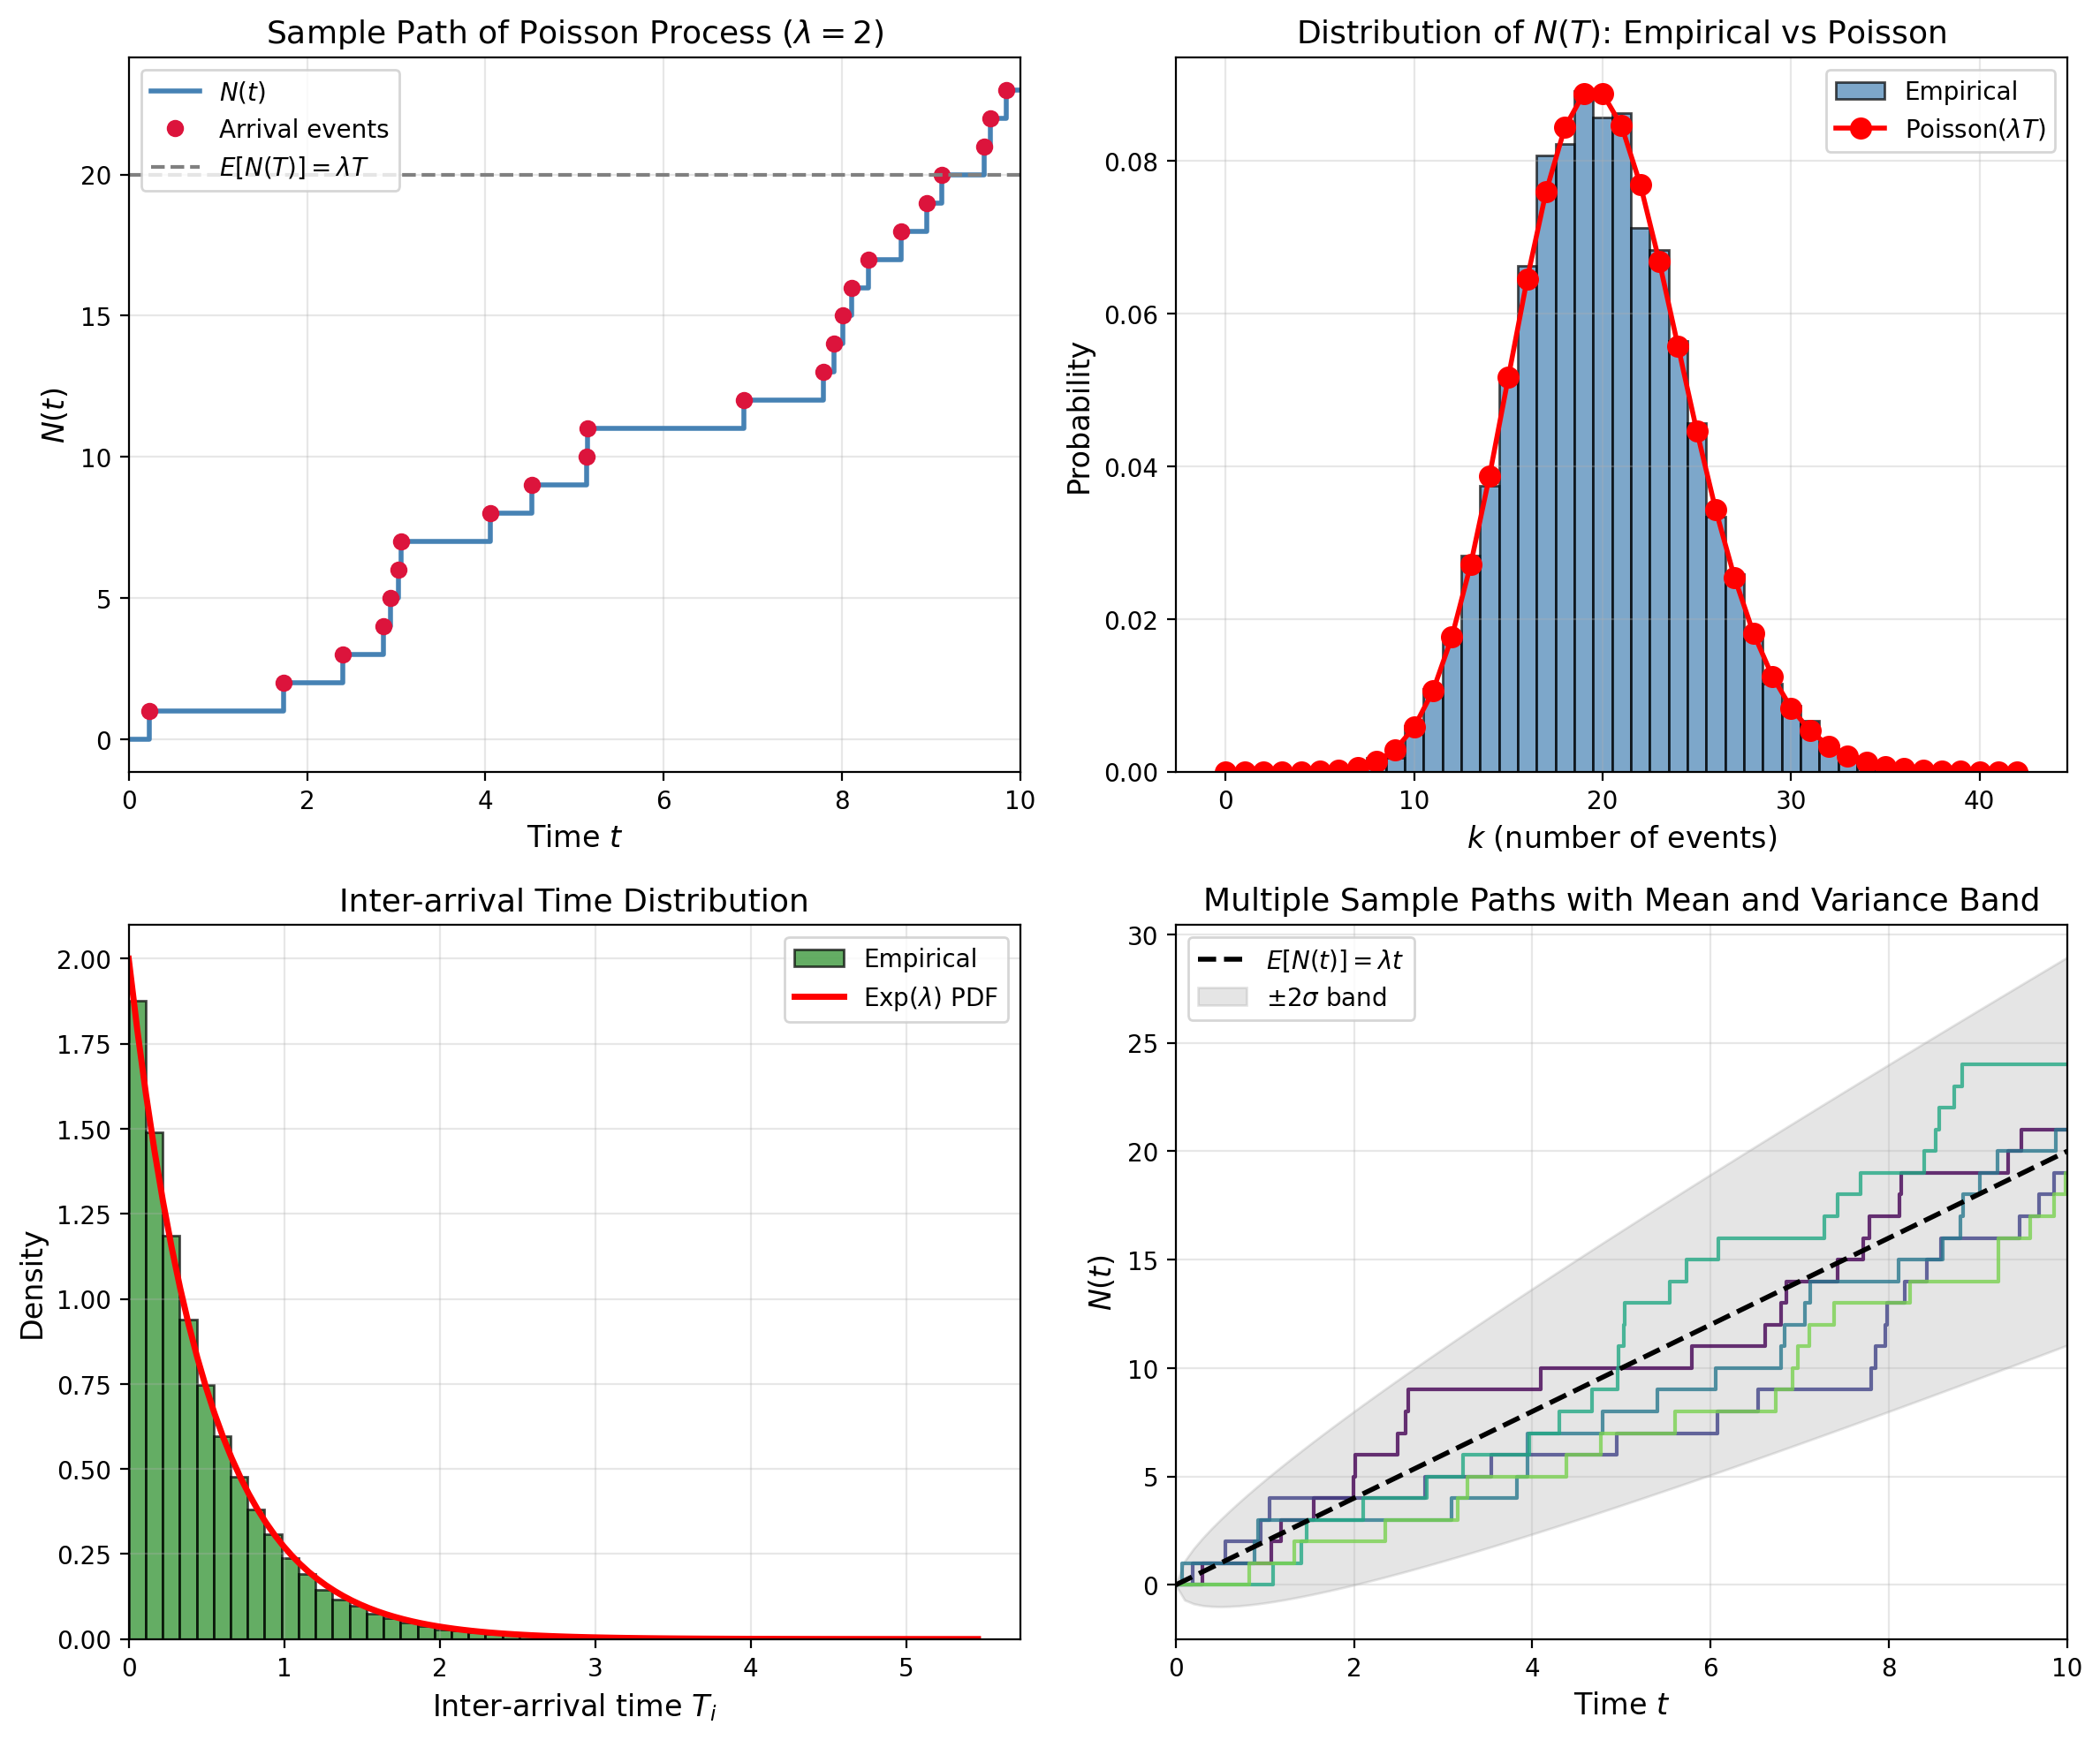


Figure saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Sample path of counting process N(t)
ax1 = axes[0, 0]
np.random.seed(42)
arrivals_sample, _ = simulate_poisson_interarrival(lambda_rate, T_max)

# Create step function for N(t)
times = np.concatenate([[0], arrivals_sample, [T_max]])
counts = np.concatenate([[0], np.arange(1, len(arrivals_sample) + 1), [len(arrivals_sample)]])

ax1.step(times, counts, where='post', linewidth=2, color='steelblue', label=r'$N(t)$')
ax1.plot(arrivals_sample, np.arange(1, len(arrivals_sample) + 1), 'o', 
         color='crimson', markersize=6, label='Arrival events')
ax1.axhline(y=lambda_rate * T_max, color='gray', linestyle='--', 
            label=r'$E[N(T)] = \lambda T$')
ax1.set_xlabel(r'Time $t$', fontsize=12)
ax1.set_ylabel(r'$N(t)$', fontsize=12)
ax1.set_title(r'Sample Path of Poisson Process ($\lambda = 2$)', fontsize=13)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, T_max)

# Plot 2: Distribution of N(T) - comparing empirical vs theoretical
ax2 = axes[0, 1]
k_values = np.arange(0, max(event_counts) + 1)
theoretical_pmf = stats.poisson.pmf(k_values, lambda_rate * T_max)

ax2.hist(event_counts, bins=np.arange(-0.5, max(event_counts) + 1.5, 1), 
         density=True, alpha=0.7, color='steelblue', edgecolor='black',
         label='Empirical')
ax2.plot(k_values, theoretical_pmf, 'ro-', markersize=8, linewidth=2,
         label=r'Poisson$(\lambda T)$')
ax2.set_xlabel(r'$k$ (number of events)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title(r'Distribution of $N(T)$: Empirical vs Poisson', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Inter-arrival time distribution
ax3 = axes[1, 0]
t_vals = np.linspace(0, max(all_interarrivals), 100)
theoretical_exp = lambda_rate * np.exp(-lambda_rate * t_vals)

ax3.hist(all_interarrivals, bins=50, density=True, alpha=0.7, 
         color='forestgreen', edgecolor='black', label='Empirical')
ax3.plot(t_vals, theoretical_exp, 'r-', linewidth=2.5,
         label=r'Exp$(\lambda)$ PDF')
ax3.set_xlabel(r'Inter-arrival time $T_i$', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)
ax3.set_title('Inter-arrival Time Distribution', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, None)

# Plot 4: Multiple sample paths
ax4 = axes[1, 1]
colors = plt.cm.viridis(np.linspace(0, 0.8, 5))

for i, color in enumerate(colors):
    arrivals_i, _ = simulate_poisson_interarrival(lambda_rate, T_max)
    times_i = np.concatenate([[0], arrivals_i, [T_max]])
    counts_i = np.concatenate([[0], np.arange(1, len(arrivals_i) + 1), [len(arrivals_i)]])
    ax4.step(times_i, counts_i, where='post', linewidth=1.5, color=color, alpha=0.8)

# Plot expected value line
t_line = np.linspace(0, T_max, 100)
ax4.plot(t_line, lambda_rate * t_line, 'k--', linewidth=2, 
         label=r'$E[N(t)] = \lambda t$')
ax4.fill_between(t_line, 
                  lambda_rate * t_line - 2*np.sqrt(lambda_rate * t_line),
                  lambda_rate * t_line + 2*np.sqrt(lambda_rate * t_line),
                  alpha=0.2, color='gray', label=r'$\pm 2\sigma$ band')
ax4.set_xlabel(r'Time $t$', fontsize=12)
ax4.set_ylabel(r'$N(t)$', fontsize=12)
ax4.set_title('Multiple Sample Paths with Mean and Variance Band', fontsize=13)
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, T_max)

plt.tight_layout()
plt.savefig('poisson_process_simulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## 5. Statistical Tests

We perform rigorous statistical tests to validate our simulation.

In [6]:
# Kolmogorov-Smirnov test for inter-arrival times
ks_statistic, ks_pvalue = stats.kstest(all_interarrivals, 'expon', 
                                        args=(0, 1/lambda_rate))
print("=== Kolmogorov-Smirnov Test for Inter-arrival Times ===")
print(f"H0: Inter-arrival times follow Exp({lambda_rate})")
print(f"KS statistic: {ks_statistic:.4f}")
print(f"p-value: {ks_pvalue:.4f}")
print(f"Conclusion: {'Fail to reject H0' if ks_pvalue > 0.05 else 'Reject H0'} at α = 0.05")

# Chi-squared test for N(T) distribution
print("\n=== Chi-Squared Test for N(T) Distribution ===")
observed_freq, bins = np.histogram(event_counts, 
                                   bins=np.arange(min(event_counts)-0.5, 
                                                  max(event_counts)+1.5, 1))
bin_centers = (bins[:-1] + bins[1:]) / 2
expected_freq = n_simulations * stats.poisson.pmf(bin_centers.astype(int), 
                                                   lambda_rate * T_max)

# Combine bins with expected frequency < 5
mask = expected_freq >= 5
chi2_stat = np.sum((observed_freq[mask] - expected_freq[mask])**2 / expected_freq[mask])
dof = np.sum(mask) - 1 - 1  # -1 for constraint, -1 for estimated parameter
chi2_pvalue = 1 - stats.chi2.cdf(chi2_stat, dof)

print(f"H0: N(T) follows Poisson({lambda_rate * T_max})")
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {chi2_pvalue:.4f}")
print(f"Conclusion: {'Fail to reject H0' if chi2_pvalue > 0.05 else 'Reject H0'} at α = 0.05")

=== Kolmogorov-Smirnov Test for Inter-arrival Times ===
H0: Inter-arrival times follow Exp(2.0)
KS statistic: 0.0179
p-value: 0.0000
Conclusion: Reject H0 at α = 0.05

=== Chi-Squared Test for N(T) Distribution ===
H0: N(T) follows Poisson(20.0)
Chi-squared statistic: 23.2180
Degrees of freedom: 27
p-value: 0.6732
Conclusion: Fail to reject H0 at α = 0.05


## 6. Conclusion

This notebook demonstrated the simulation and verification of the **Poisson process**, a fundamental stochastic process with wide applications in:

- **Queueing theory**: Customer arrivals, service requests
- **Reliability engineering**: Equipment failures, maintenance events
- **Telecommunications**: Packet arrivals, call arrivals
- **Physics**: Radioactive decay, photon detection
- **Finance**: Trade arrivals, default events

### Key Results

1. The **inter-arrival times** follow an exponential distribution with mean $1/\lambda$, confirmed by the Kolmogorov-Smirnov test.

2. The **number of events** $N(T)$ in interval $[0, T]$ follows a Poisson distribution with parameter $\lambda T$, validated by the chi-squared goodness-of-fit test.

3. Both simulation methods (inter-arrival time and order statistics) produce statistically equivalent results.

4. The sample paths exhibit the expected behavior: mean $E[N(t)] = \lambda t$ and variance $\text{Var}(N(t)) = \lambda t$.

### Extensions

The homogeneous Poisson process studied here can be extended to:
- **Non-homogeneous Poisson processes** with time-varying rate $\lambda(t)$
- **Compound Poisson processes** with random event magnitudes
- **Marked Poisson processes** with additional event attributes